In [12]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
model=load_model("/models/mobilenetv2-model/cats-dogs-pretrained-model.model")

In [4]:
def readImage(imagePath , figsize = (10 , 5) , wspace = 0.2):
  img_array = cv2.imread(imagePath)
  img_array = cv2.resize(img_array , (224 , 224))
  img_array = cv2.cvtColor(img_array , cv2.COLOR_BGR2RGB)
  img_array = img_to_array(img_array)
  img_array = preprocess_input(img_array)
  img_array = np.expand_dims(img_array , axis = 0)
  (cat , dog) = model.predict(img_array)[0]
  label = "Cat" if cat > dog else "Dog"
  label = label + "(" + str(round(max(cat , dog) * 100 , 2)) + "%)"
  
  fig , axes = plt.subplots(1 , 2 , figsize = figsize)
  plt.subplots_adjust(wspace = wspace)
  axes = axes.flatten()
  img = mpimg.imread(imagePath)
  axes[0].imshow(img)
  axes[0].set_title(label)
  axes[0].tick_params(labelbottom = False , labelleft = False)
  probs = model.predict(img_array)[0]
  labels = ["Cat" , "Dog"]
  axes[1].bar(labels , probs , width = 0.2 ,  label = "probability")

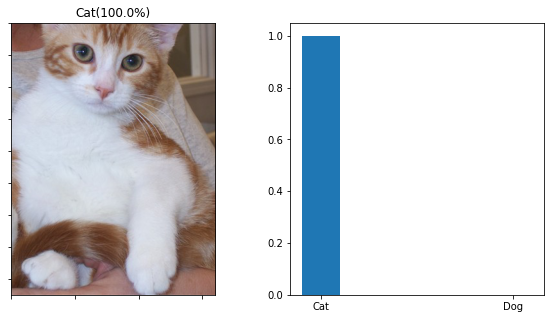

In [5]:
readImage(imagePath = "/image-samples/9.jpg")

In [14]:
class feature_maps():
  def __init__(self , model ,  imagePath , rows = 8 , cols = 4 , conv_layer = 1 , figsize  = (16 , 16) , wspace = 0.1 , hspace = 0.3):
    self.model = model
    self.imagePath = imagePath
    self.rows = rows
    self.cols = cols
    self.conv_layer = conv_layer
    self.figsize = figsize
    self.wspace = wspace
    self.hspace = hspace

  def conv_infos(self):
    for i in range(len(self.model.layers)):
      layer = self.model.layers[i]
      if "conv" not in layer.name:    # check for convolutional layer
        continue
      print(i, layer.name, layer.output.shape)

  def find_conv_indeces(self):
    conv_indeces = []
    for i in range(len(self.model.layers)):
      layer = self.model.layers[i]
      if "conv" not in layer.name:    # check for convolutional layer
        continue
        print(i, layer.name, layer.output.shape)
      conv_indeces.append(i)
    return conv_indeces

  def visualize_features(self):

    outputs = {i : self.model.layers[i].output for i in self.find_conv_indeces()}
    output = outputs[self.conv_layer]
    print("This layer has {} feature maps".format(self.model.layers[self.conv_layer].output.shape[3]))
    feature_model = Model(inputs = self.model.inputs , outputs = output)
    img = cv2.imread(self.imagePath)
    img = cv2.resize(img , (224 , 224))
    img = np.expand_dims(img , axis = 0)
    feature_maps = feature_model.predict(img)

    index = 1
    fig , axes = plt.subplots(self.rows , self.cols , figsize = self.figsize)
    fig.subplots_adjust(wspace = self.wspace , hspace = self.hspace) 

    for i in range(self.rows):
      for j in range(self.cols):      
        axes[i , j].set_xticks([])
        axes[i , j].set_yticks([])
        axes[i , j].imshow(feature_maps[0 , : , : , index - 1], cmap = "gray")
        fig.suptitle("{0} Feature Maps of Convolution layer #{1}".format(self.rows * self.cols , self.conv_layer) , fontsize = "x-large")
        index += 1
    # fig.subplots_adjust(top=0.85)
    # fig.tight_layout()
    
    plt.show()

This layer has 32 feature maps


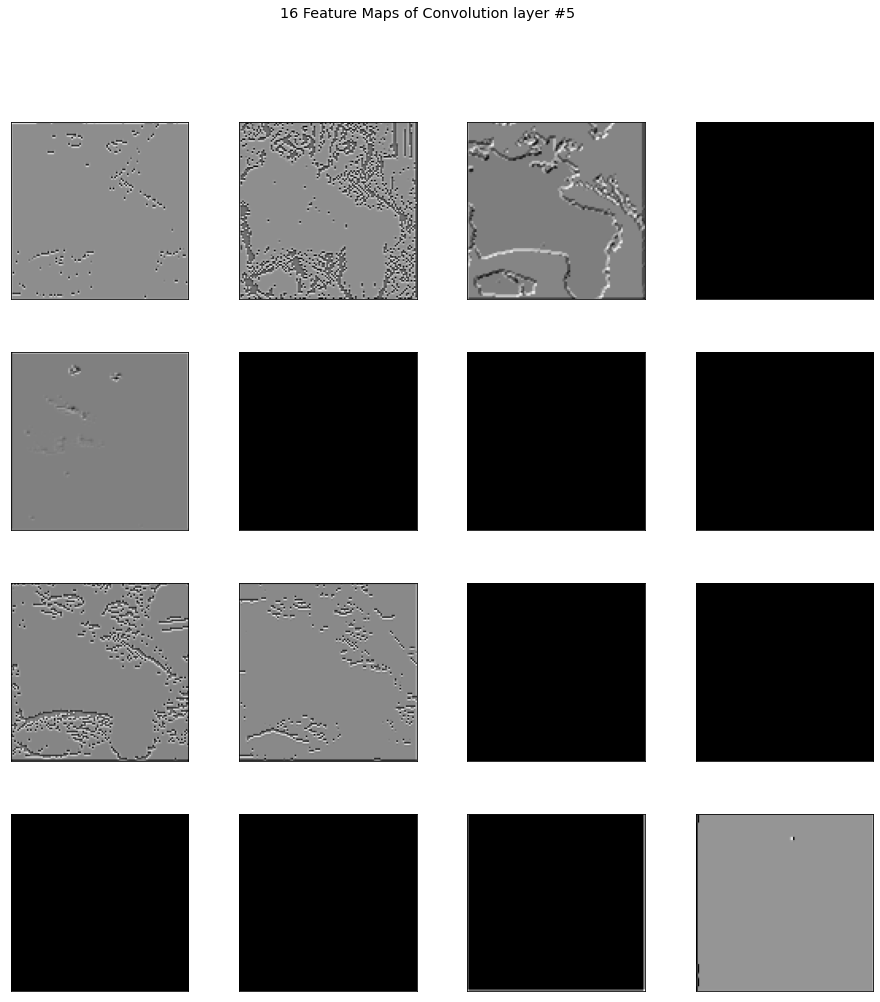

In [21]:
my_model = feature_maps(imagePath = "/image-samples/9.jpg",
                 model = model,
                 conv_layer = 5,
                 rows = 4,
                 cols = 4,
                 wspace=0.1,
                 hspace=0.3)
my_model.visualize_features()

In [8]:
my_model.find_conv_indeces()

[4, 5, 6, 7, 8]

In [19]:
my_model.conv_infos()

4 expanded_conv_depthwise (None, 112, 112, 32)
5 expanded_conv_depthwise_BN (None, 112, 112, 32)
6 expanded_conv_depthwise_relu (None, 112, 112, 32)
7 expanded_conv_project (None, 112, 112, 16)
8 expanded_conv_project_BN (None, 112, 112, 16)
